![Hermite Simpson Transcription](assets/Hermite_Simpson.png)

In [25]:
import sys
sys.path.append('../')
# Import resources
from Trajectory import Point_Lander
from Optimisation import Hermite_Simpson

In [26]:
# Instantiate the model
mod = Point_Lander(si=[10, 1000, -5, -2, 9800])

In [27]:
# Look at the model's details. Note that the target mass irrelevent
print mod

State
	Dimensions: 5
	Initial: [  1.00000000e+01   1.00000000e+03  -5.00000000e+00  -2.00000000e+00
   9.80000000e+03]
	Target: [    0.     0.     0.     0.  8000.]
	Lower Bound: [-1000.     0.  -500.  -500.     0.]
	Upper Bound: [  1000.   2000.    500.    500.  10000.]
Control
	Dimensions: 3
	Lower Bound: [-0.001 -1.    -0.001]
	Upper Bound: [ 1.  1.  1.]
Time
	Lower Bound: 1.0
	Upper Bound: 200.0



In [28]:
# Setup the optimisation problem
prob = Hermite_Simpson(mod, nsegs=40)

In [29]:
# Take a ballistic guess
zguess = prob.Guess.Ballistic(tf=30)

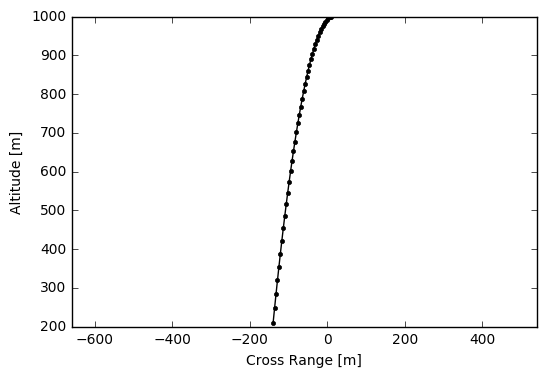

In [81]:
# Visualise what the guess looks like
tf, cb, s, c = prob.Decode(zguess)
import matplotlib.pyplot as plt
plt.plot(s[:,0], s[:,1], 'k.-')
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('Cross Range [m]')
plt.ylabel('Altitude [m]')
plt.show()

In [31]:
# Use PyGMO to optimise
from PyGMO import *
pop = population(prob)
pop.push_back(zguess) # add the ballistic guess

In [32]:
algo = algorithm.scipy_slsqp(max_iter=3000, screen_output=True)
algo = algorithm.mbh(algo, screen_output=True, stop=2)

In [33]:
# Evolve the ballistic trajectory into an optimal control trajectory
pop = algo.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1   451    -9.394959E+03     1.000000E+00
    2   902    -9.395894E+03     1.000000E+00
    3  1353    -9.397173E+03     1.000000E+00
    4  1804    -9.398345E+03     1.000000E+00
    5  2255    -9.401563E+03     1.000000E+00
    6  2706    -9.421631E+03     1.000000E+00
    7  3157    -9.405082E+03     1.000000E+00
    8  3608    -9.271316E+03     1.000000E+00
    9  4059    -9.251254E+03     1.000000E+00
   10  4510    -9.252952E+03     1.000000E+00
   11  4961    -9.256923E+03     1.000000E+00
   12  5413    -9.259441E+03     1.000000E+00
   13  5865    -9.261395E+03     1.000000E+00
   14  6317    -9.264604E+03     1.000000E+00
   15  6769    -9.271111E+03     1.000000E+00
   16  7221    -9.283070E+03     1.000000E+00
   17  7672    -9.310058E+03     1.000000E+00
   18  8123    -9.318345E+03     1.000000E+00
   19  8574    -9.324641E+03     1.000000E+00
   20  9025    -9.333937E+03     1.000000E+00
   21  9476    -9.339110E+03     1

In [36]:
tf, cb, s, c = prob.Decode(pop.champion.x)

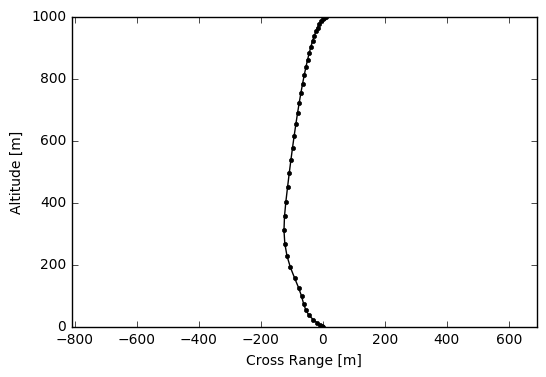

In [79]:
import matplotlib.pyplot as plt
plt.plot(s[:,0], s[:,1], 'k.-')
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('Cross Range [m]')
plt.ylabel('Altitude [m]')
plt.show()

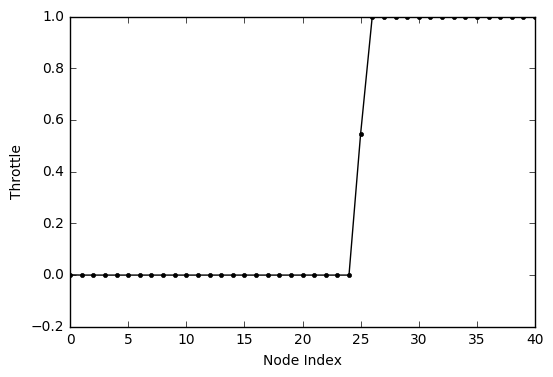

In [80]:
plt.plot(cb[:,0], 'k.-')
plt.xlabel('Node Index')
plt.ylabel('Throttle')
plt.show()

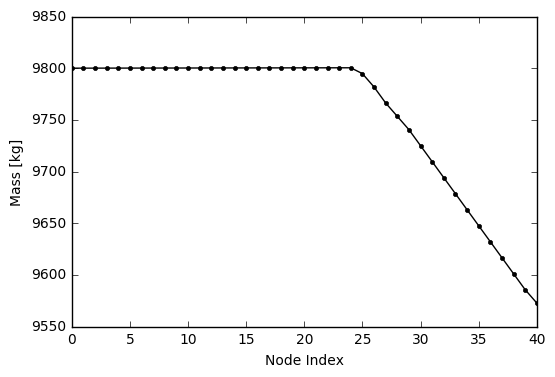

In [59]:
plt.plot(s[:,4],'k.-')
plt.xlabel('Node Index')
plt.ylabel('Mass [kg]')
plt.show()

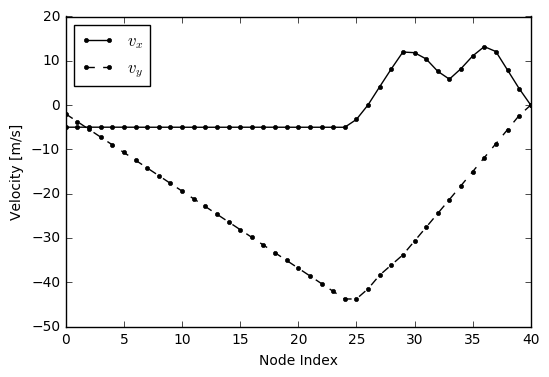

In [58]:
plt.plot(s[:,2], 'k.-')
plt.plot(s[:,3], 'k.--')
plt.legend(['$v_x$', '$v_y$'], loc='best')
plt.xlabel('Node Index')
plt.ylabel('Velocity [m/s]')
plt.show()